In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import scipy
import random
import math as m
import re
import heapq
import seaborn as sns
import math 
warnings.filterwarnings('ignore')


In [2]:
df_c = pd.read_csv('Close.csv', index_col=0)
df_hh = pd.read_csv('High.csv', index_col=0)
df_ll = pd.read_csv('Low.csv', index_col=0)
df_oo = pd.read_csv('Open.csv', index_col=0)
df_vv = pd.read_csv('Volume.csv', index_col=0)

In [3]:
#дубликаты убираем
df = df_c[~df_c.index.duplicated(keep='first')].T
df_h = df_hh[~df_hh.index.duplicated(keep='first')].T
df_l = df_ll[~df_ll.index.duplicated(keep='first')].T
df_o = df_oo[~df_oo.index.duplicated(keep='first')].T
df_v = df_vv[~df_vv.index.duplicated(keep='first')].T

In [4]:
#очистка чтобы убрать выбросы данных
def clean_data(df):
    df = df.mask((abs(10*df/df.shift(-1) - 1) < 0.1) & (abs(10*df/df.shift(1) - 1) < 0.1), 10*df)
    df = df.mask((abs(100*df/df.shift(-1) - 1) < 0.1) & (abs(100*df/df.shift(1) - 1) < 0.1), 100*df)
    # df.columns = range(df.shape[1])
    df.index = pd.to_datetime(df.index)
    return df
df = clean_data(df)
df_h = clean_data(df_h)
df_l = clean_data(df_l)
df_o = clean_data(df_o)
df_v = clean_data(df_v)

In [5]:
df

,iba.us,wpz.us,flic.us,ncs.us,gpk.us,wti.us,mygn.us,kelya.us,nycb.us,elp.us,...,nea.us,asx.us,faro.us,awk.us,chn.us,omex.us,roic.us,nbl.us,atu.us,apf.us
2010-01-04,20.955,22.033,9.2675,9.25,3.4102,9.667,26.16,11.170,9.5970,16.349,...,9.4916,2.8483,21.64,19.067,12.689,17.16,7.7712,33.510,18.475,12.058
2010-01-05,20.259,22.383,9.2675,10.30,3.4959,9.987,26.55,11.843,9.5150,16.750,...,9.5960,3.0744,21.65,19.288,13.153,17.76,7.8707,33.959,18.720,12.411
2010-01-06,20.866,22.667,9.1616,10.45,3.4388,10.081,26.72,11.881,9.4911,16.735,...,9.5350,3.0744,20.86,19.473,13.367,17.88,7.8863,34.766,18.730,12.279
2010-01-07,20.674,22.660,9.0283,10.10,3.3435,10.234,26.96,11.549,9.5050,16.727,...,9.5490,3.1945,20.84,19.669,13.257,16.68,7.7865,34.889,18.900,12.345
2010-01-08,20.796,22.104,9.0356,10.40,3.5341,10.047,26.50,11.669,9.7190,16.409,...,9.5690,3.2298,21.51,19.651,13.040,17.52,7.8400,34.357,19.116,12.485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-24,47.625,42.097,17.0240,17.68,13.0970,7.510,36.41,16.302,13.7890,11.711,...,11.7600,5.6416,63.59,49.902,15.448,11.52,15.2360,46.552,27.048,14.415
2014-12-26,48.014,41.828,17.0550,17.86,13.2610,7.610,36.66,16.755,13.7190,12.076,...,11.7780,5.6688,64.11,50.577,15.916,11.76,15.3000,46.612,27.098,14.385
2014-12-29,48.101,41.145,17.6360,17.97,13.3730,7.650,36.48,16.332,13.8050,12.048,...,11.7940,5.6777,65.26,50.673,15.908,11.28,15.3510,45.633,27.435,14.532
2014-12-30,47.996,40.834,17.9260,18.60,13.2320,7.600,35.29,16.483,13.8580,12.183,...,11.8260,5.6235,63.16,52.192,15.713,11.04,15.3890,45.556,27.624,14.425


In [6]:
#функция нейтрализации
def neutralization(alp):
  return (alp.T - alp.mean(axis="columns")).T

In [7]:
#функция нормализации
def normalization(alp):
    return (alp.T / alp.abs().sum(axis=1)).T

In [8]:
#строим альфу −closei(d − 1)/closei(d − 6)
alp = -df.shift(1)/ df.shift(6) + 1
alp = normalization(neutralization(alp))

In [9]:
alp

,iba.us,wpz.us,flic.us,ncs.us,gpk.us,wti.us,mygn.us,kelya.us,nycb.us,elp.us,...,nea.us,asx.us,faro.us,awk.us,chn.us,omex.us,roic.us,nbl.us,atu.us,apf.us
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-24,0.000232,-0.000728,0.000148,0.000118,-0.000001,-0.003616,-0.000184,0.000045,0.000103,-0.000140,...,0.000602,0.000461,-0.000518,0.000389,0.000600,0.000260,-0.000103,-0.001410,0.001133,0.000356
2014-12-26,0.000550,-0.000706,-0.000236,0.000390,-0.000072,-0.002649,-0.000617,-0.000255,0.000099,-0.000328,...,0.000583,0.000244,-0.001005,0.000122,0.000807,0.001594,-0.000106,-0.000634,0.001074,0.000487
2014-12-29,0.000435,-0.000583,0.000011,0.000566,-0.000274,-0.000953,-0.000767,-0.000628,0.000088,-0.000373,...,0.000204,0.000263,-0.001231,-0.000259,0.000473,0.001310,0.000086,0.000529,0.001007,0.000299
2014-12-30,0.000708,-0.000442,-0.000354,0.000128,-0.000377,-0.001781,-0.000153,-0.000224,0.000112,-0.000705,...,0.000194,0.000240,-0.001311,-0.000104,0.000471,0.001550,0.000103,0.001020,0.000682,0.000244


In [10]:
alp.sum(axis=1)

2010-01-04    0.000000e+00
2010-01-05    0.000000e+00
2010-01-06    0.000000e+00
2010-01-07    0.000000e+00
2010-01-08    0.000000e+00
                  ...     
2014-12-24   -3.261280e-16
2014-12-26    1.110223e-16
2014-12-29   -7.632783e-17
2014-12-30    8.326673e-17
2014-12-31    2.081668e-17
Length: 1257, dtype: float64

In [11]:
alp.abs().sum(axis=1)

2010-01-04    0.0
2010-01-05    0.0
2010-01-06    0.0
2010-01-07    0.0
2010-01-08    0.0
             ... 
2014-12-24    1.0
2014-12-26    1.0
2014-12-29    1.0
2014-12-30    1.0
2014-12-31    1.0
Length: 1257, dtype: float64

In [12]:
#return(d)
def return_dd(df):
    return_d = df / df.shift(1) - 1
    return return_d

In [13]:
return_d = return_dd(df)

In [14]:
#функция доходности
def pnl(alp):
    pnll = alp.shift(2) * return_dd(df)
    return pnll.sum(axis=1)

In [15]:
#оборот альфы
def turnover(alp):
  turnovers = []
  for i in range(5):
    turnovers.append(alp[252*i:252*(i+1)].diff().abs().sum(axis=1).mean())
  return turnovers

In [16]:
turnover(alp)

[0.6474355168867681,
 0.6667057313206928,
 0.6688492668338448,
 0.6575104003052424,
 0.6591797693478829]

In [17]:
#коэффициент Шарпа
def sharpe(alp):
  sharpes = []
  for i in range(5):
    sharpes.append(pnl(alp)[252*i:252*(i+1)].mean() / pnl(alp)[252*i:252*(i+1)].std() * 252**0.5)

  return sharpes

In [18]:
sharpe(alp)

[1.5344934174216616,
 2.5323395837990645,
 2.5950082754424204,
 1.5951814155461415,
 0.4218866878814676]

In [19]:
#вектор накопленных доходностей за каждый день
def cumpnl(alp):
  return pnl(alp).cumsum()

In [20]:
cumpnl(alp)

2010-01-04    0.000000
2010-01-05    0.000000
2010-01-06    0.000000
2010-01-07    0.000000
2010-01-08    0.000000
                ...   
2014-12-24    0.491491
2014-12-26    0.491981
2014-12-29    0.492568
2014-12-30    0.495700
2014-12-31    0.495316
Length: 1257, dtype: float64

In [21]:
#по годам 
def cumpnl_Y(alp):
  cumpnls = []
  for i in range(5):
    cumpnls.append(pnl(alp)[252*i:252*(i+1)].sum())

  return cumpnls

In [22]:
cumpnl_Y(alp)

[0.09024530739866982,
 0.1967928657431348,
 0.11097583125474382,
 0.06918986707414385,
 0.028112605256676918]

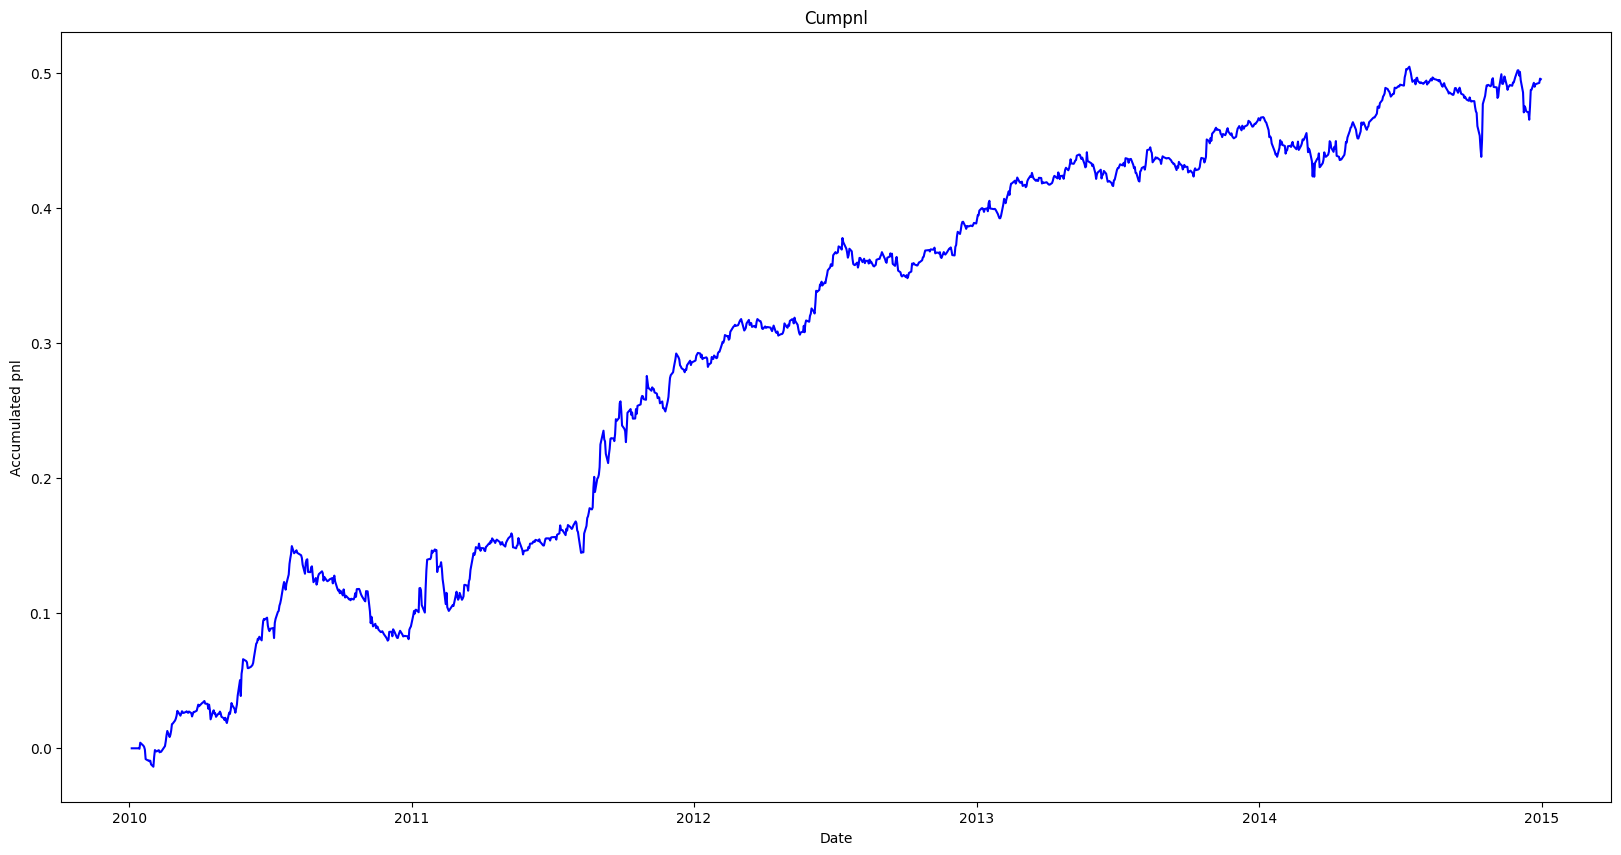

In [23]:
plt.figure(figsize=(20,10))
plt.title('Cumpnl')
plt.xlabel('Date')
plt.ylabel('Accumulated pnl')
plt.plot((cumpnl(alp)),'b')
plt.rc('font', size= 25 )

plt.show()

In [24]:
#максимальная просадка
def drawdown(alp):
    max_drawdown = 0
    max_cumpnl = cumpnl(alp)[0]
    for i in cumpnl(alp):
        if i > max_cumpnl:
            max_cumpnl = i
        else:
            if max_cumpnl - i > max_drawdown:
                max_drawdown = max_cumpnl - i
    return max_drawdown

In [25]:
drawdown(alp)

0.06998537967568204

In [26]:
#
def truncate(alp, threshold):
    current_threshold = threshold * 0.9
    max_iterations = 5
    for _ in range(max_iterations):
        alp = alp.clip(-current_threshold, current_threshold)
        alp[alp > 0] = alp[alp > 0].div(2 * alp[alp > 0].sum(axis=1), axis=0)
        alp[alp < 0] = alp[alp < 0].div(-2 * alp[alp < 0].sum(axis=1), axis=0)
    return normalization(neutralization(alp))

In [27]:
def rank(alp):
  return (alp.T.rank(axis=0)/(alp.shape[1])).T

In [28]:
def volatilityy(return_d):
  volatility = return_d.std(axis=0)
  return volatility

In [29]:
volatilityy(return_d)

iba.us     0.018458
wpz.us     0.015917
flic.us    0.017140
ncs.us     0.030012
gpk.us     0.022789
             ...   
omex.us    0.041563
roic.us    0.010695
nbl.us     0.018360
atu.us     0.019683
apf.us     0.010568
Length: 2404, dtype: float64

In [30]:
def corr(alpha1, alpha2):
  return alpha1.corrwith(alpha2)

In [31]:
def decay(alp, win):
  return alp.rolling(win).rank()

In [32]:
from tabulate import tabulate

In [33]:
def AlphaStats(alp):
    plt.figure(figsize=(12,6))
    plt.title('Return')
    plt.xlabel('Date')
    plt.ylabel('Profit')
    plt.plot(cumpnl(alp), "b")
    plt.legend(['Return'], loc='upper left')
    plt.rc('font', size= 25 )
    plt.show()

# вывод таблицы

    sharpes = []
    turnovers = []
    cumpnls = []
    pnl_sum = []
    drawdownss = []
    years = ["2010", "2011", "2012", "2013", "2014"]
    data = {
            'years': years,
            'sharpes': sharpes,
            'turnovers': turnovers,
            'cumpnls': cumpnls,
            'pnl_sum' : pnl_sum,
            'drawdownss': drawdownss

        }

    data['sharpes'] = sharpe(alp)
    data['turnovers'] = turnover(alp)
    data['cumpnls'] = cumpnl_Y(alp)
    data['pnl_sum'] = pnl(alp).sum()

    for i in range(5):
        data['drawdownss'] = drawdown(alp[252*i:252*(i+1)])


    return pd.DataFrame.from_dict(data)
    


In [34]:
def ts_rank(alp, win):
  alp = alp.rolling(win).rank()
  alp = normalization(neutralization(alp))
  return alp

In [35]:
def decay(alp, win):
    alp = alp.ewm(win).mean()
    alp = normalization(neutralization(alp))
    return alp

In [36]:
def cut_middle(alp, number):
    sorted_series = alp.sort_values()
    low = round((len(alp)/2)-n*0.5)
    high = round((len(alp)/2)+n*0.5)
    middle_indexes = sorted_series.index[low:high]
    series_without_middle = alp.copy()
    series_without_middle.loc[middle_indexes] = 0
    return series_without_middle
def cut_middle_dataframe(alp, n):
    return alp.T.apply(lambda idx: cut_middle(idx, n)).T

In [37]:
def CutOutliers(alp, number):
    modified_dataframe = alp.copy()

    for date, row in alp.iterrows():
        top_n_indexes = row.nlargest(n).index
        bottom_n_indexes = row.nsmallest(n).index

        modified_dataframe.loc[date, top_n_indexes] = 0
        modified_dataframe.loc[date, bottom_n_indexes] = 0

    return modified_dataframe

In [39]:
alp1 = -df_h.shift(1)/ df_h.shift(6) + 1
alp1 = truncate(alp1, 0.00005)

#alp1 = normalization(neutralization(alp1))

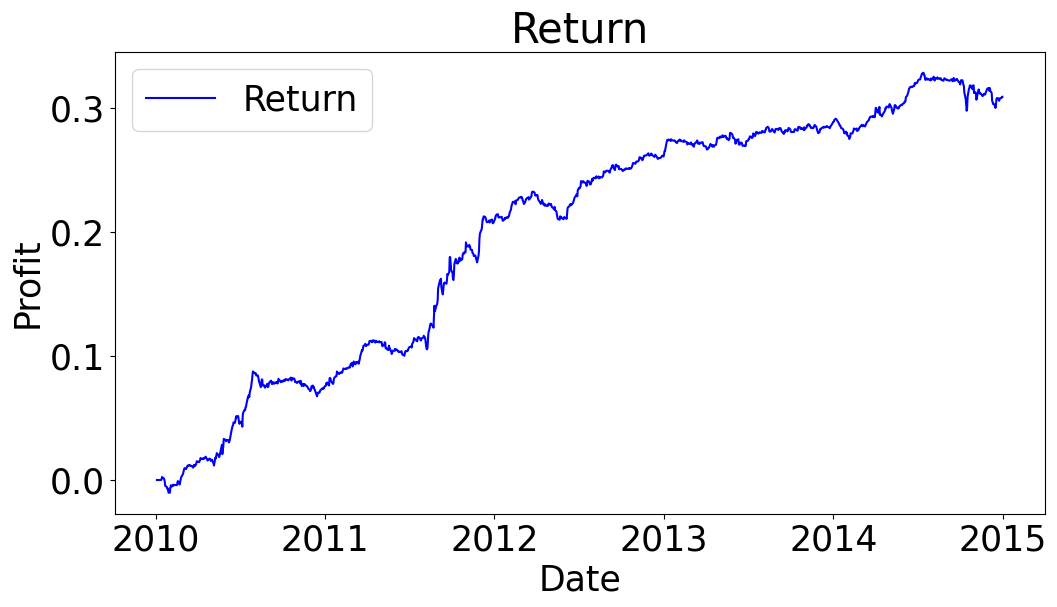

,years,sharpes,turnovers,cumpnls,pnl_sum,drawdownss
0,2010,2.576128,0.591805,0.075358,0.309193,0.030699
1,2011,3.343592,0.642769,0.135640,0.309193,0.030699
2,2012,2.662324,0.614172,0.056782,0.309193,0.030699
3,2013,1.294718,0.560183,0.023758,0.309193,0.030699
4,2014,0.625957,0.559577,0.017655,0.309193,0.030699


In [40]:
AlphaStats(alp1)

In [41]:
alp2 = ((df_h + df_l+ df_v)/df**2)
alp2 = normalization(neutralization(alp2))
alp2 = truncate(alp2, 0.00005)

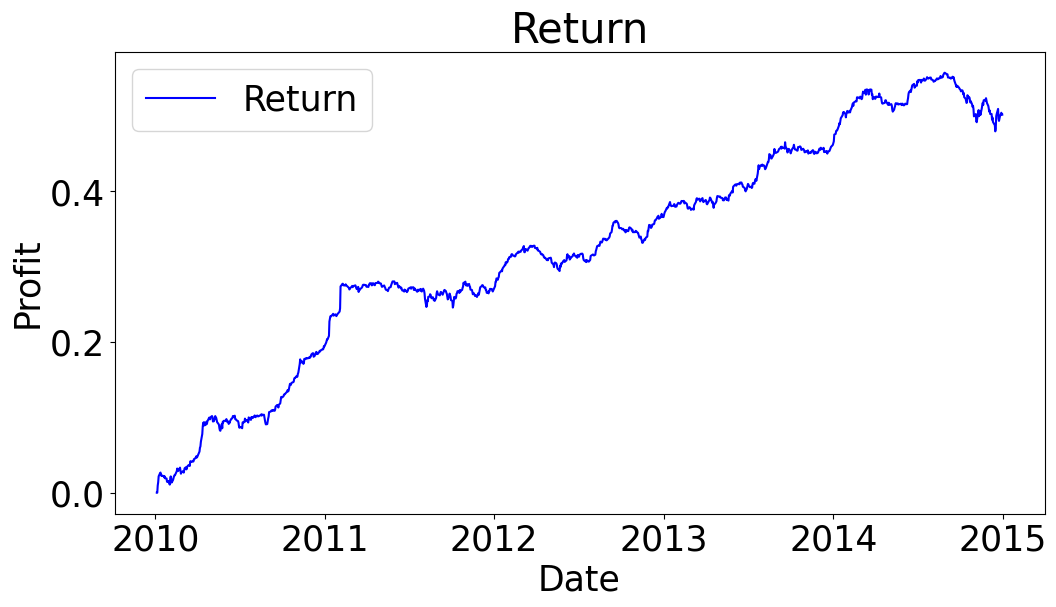

,years,sharpes,turnovers,cumpnls,pnl_sum,drawdownss
0,2010,4.091354,0.304070,0.193908,0.50178,0.077795
1,2011,1.535495,0.225085,0.080207,0.50178,0.077795
2,2012,2.781263,0.228219,0.099567,0.50178,0.077795
3,2013,2.513578,0.218588,0.102600,0.50178,0.077795
4,2014,0.471889,0.202057,0.025498,0.50178,0.077795


In [42]:
AlphaStats(alp2)

In [43]:
alp31 = (df_v + df + df_o)/(df - df_l)
alp31 = rank(alp31)
alp31 = truncate(alp31, 0.005)
alp3 = alp31/(df_h * df_l)**3
alp3 = ts_rank(df_v, 7)
alp3 = decay(alp3, 2)

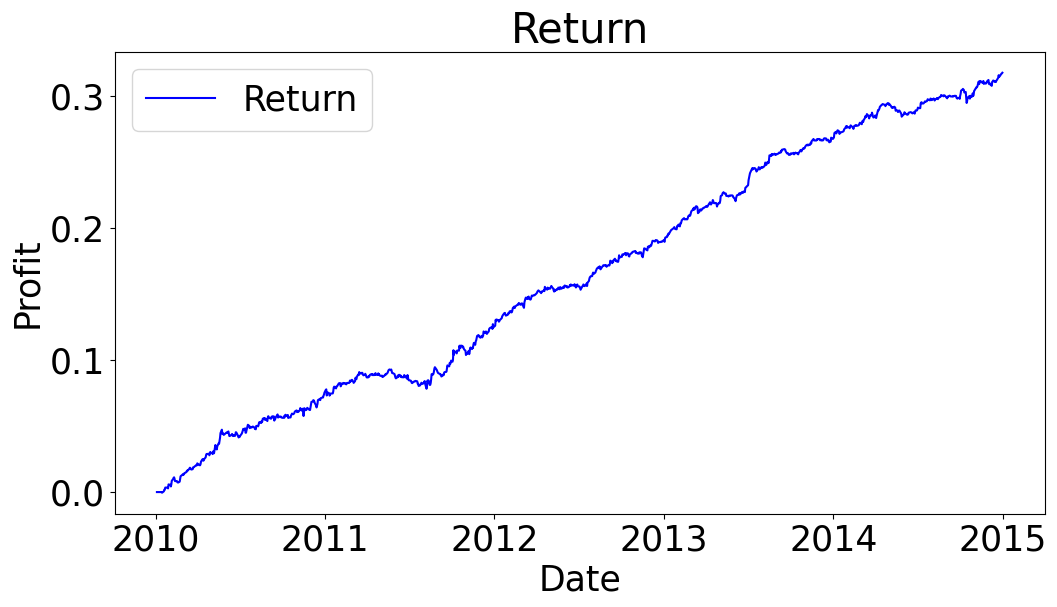

,years,sharpes,turnovers,cumpnls,pnl_sum,drawdownss
0,2010,3.637387,0.717558,0.075300,0.317698,0.010629
1,2011,2.251470,0.738957,0.050745,0.317698,0.010629
2,2012,3.718245,0.740415,0.066952,0.317698,0.010629
3,2013,4.716143,0.734117,0.079877,0.317698,0.010629
4,2014,2.500049,0.727103,0.044825,0.317698,0.010629


In [44]:
AlphaStats(alp3)

In [45]:
alp11 = ts_rank(df_v, 7)
alp11 = decay(alp11, 2)

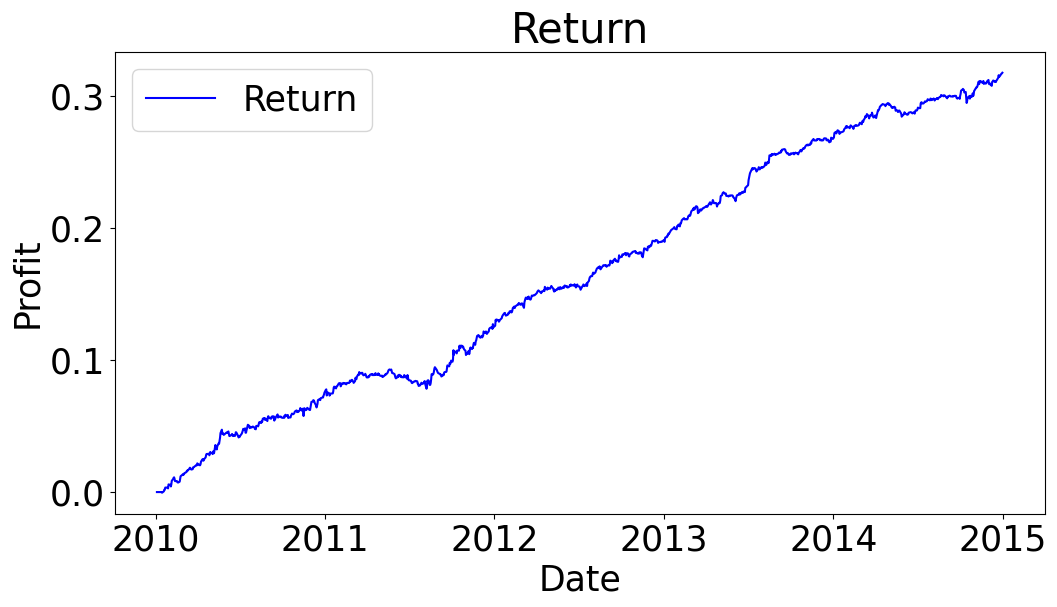

,years,sharpes,turnovers,cumpnls,pnl_sum,drawdownss
0,2010,3.637387,0.717558,0.075300,0.317698,0.010629
1,2011,2.251470,0.738957,0.050745,0.317698,0.010629
2,2012,3.718245,0.740415,0.066952,0.317698,0.010629
3,2013,4.716143,0.734117,0.079877,0.317698,0.010629
4,2014,2.500049,0.727103,0.044825,0.317698,0.010629


In [46]:
AlphaStats(alp11)

In [47]:
alp4 = (df_o + 2*df_v * df_h * df_l - 2*df) / (df + df_l)
#alp4 = ts_rank(alp4, 30)
#alp4 = decay(alp4, 3)
alp4 = truncate(alp4, 0.05)

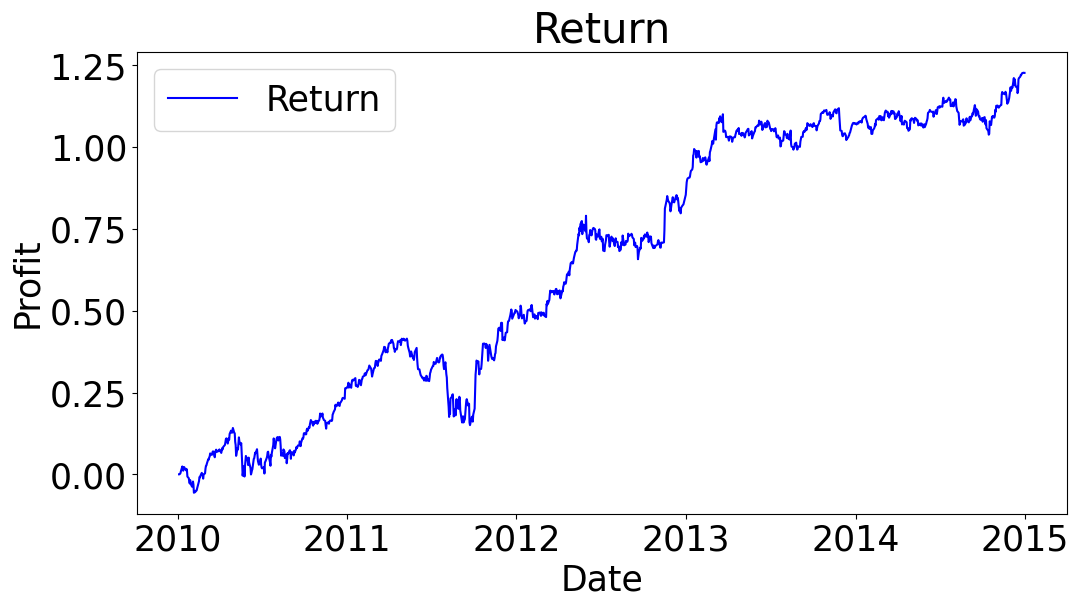

,years,sharpes,turnovers,cumpnls,pnl_sum,drawdownss
0,2010,1.360087,0.087302,0.263277,1.226591,0.113244
1,2011,0.977729,0.238095,0.233992,1.226591,0.113244
2,2012,1.792916,0.210317,0.406961,1.226591,0.113244
3,2013,0.984889,0.142857,0.170559,1.226591,0.113244
4,2014,0.932990,0.216867,0.151802,1.226591,0.113244


In [48]:
AlphaStats(alp4)


In [49]:
alp5 = -ts_rank(rank(df), 15)/(df**4)
alp5 = truncate(alp5, 0.00005)

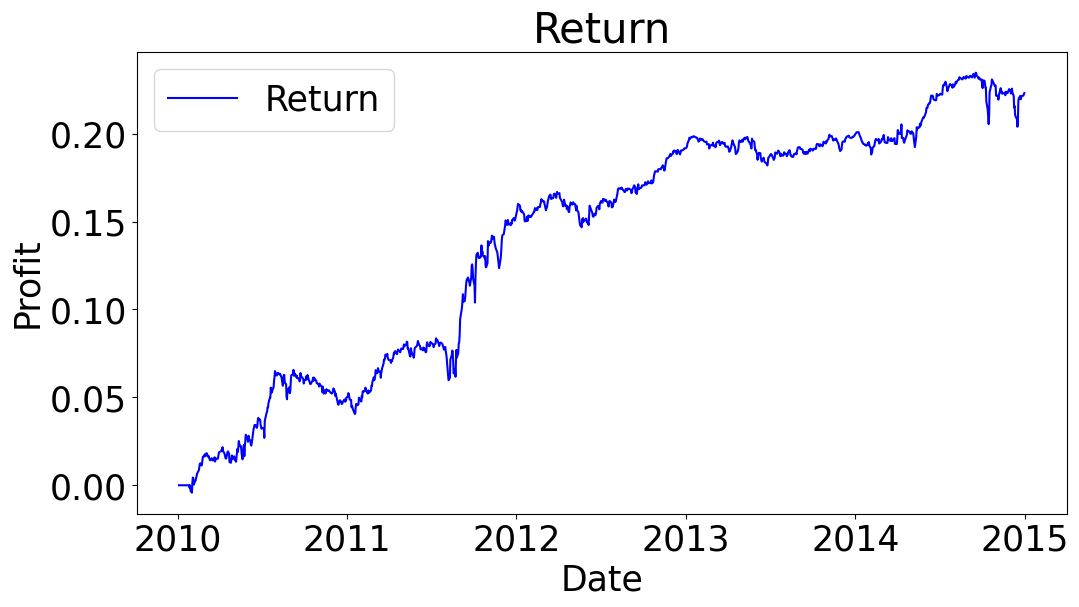

,years,sharpes,turnovers,cumpnls,pnl_sum,drawdownss
0,2010,1.436970,0.347769,0.050006,0.223121,0.03073
1,2011,2.323756,0.379508,0.106415,0.223121,0.03073
2,2012,1.597061,0.377014,0.038041,0.223121,0.03073
3,2013,0.361644,0.372236,0.006467,0.223121,0.03073
4,2014,0.650868,0.375038,0.022192,0.223121,0.03073


In [50]:
AlphaStats(alp5)

In [51]:
alp6 = ((-((df_l-df)*(df_o**5)))/((df_l-df_h)*(df**5)))
alp6 = rank(alp6)
alp6 = truncate(alp6, 0.05)

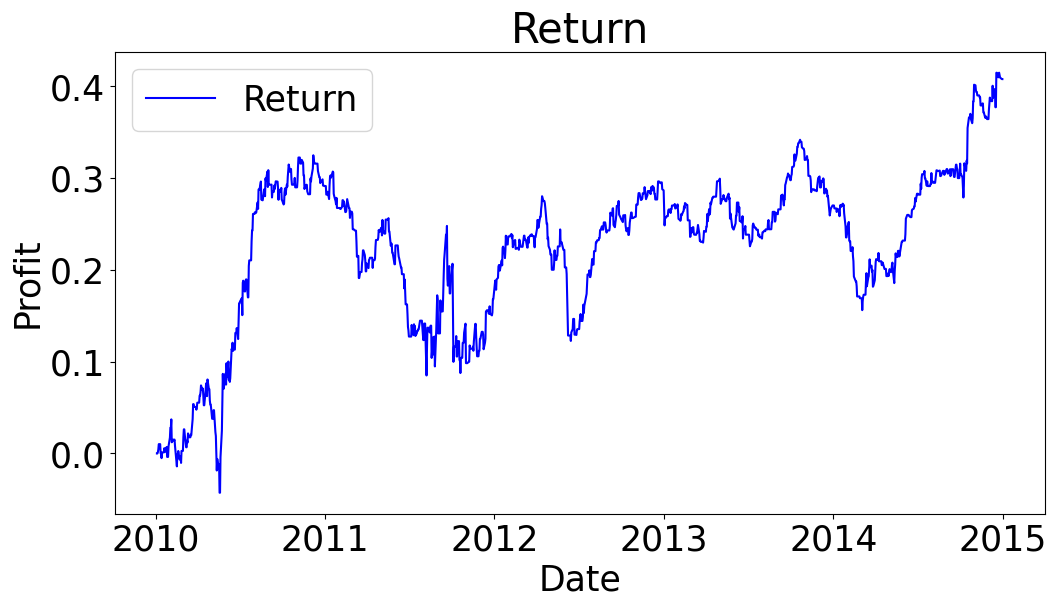

,years,sharpes,turnovers,cumpnls,pnl_sum,drawdownss
0,2010,1.760027,0.428861,0.291370,0.407884,0.116015
1,2011,-0.494940,0.362944,-0.102987,0.407884,0.116015
2,2012,0.579120,0.391917,0.068045,0.407884,0.116015
3,2013,0.111425,0.418724,0.010601,0.407884,0.116015
4,2014,1.208983,0.467812,0.140854,0.407884,0.116015


In [52]:
AlphaStats(alp6)

In [53]:
alp7 = rank((-1*((1-(df_o/df**2))**5)))
alp7 = truncate(alp7, 0.05)
alp7 = decay(alp7,10)

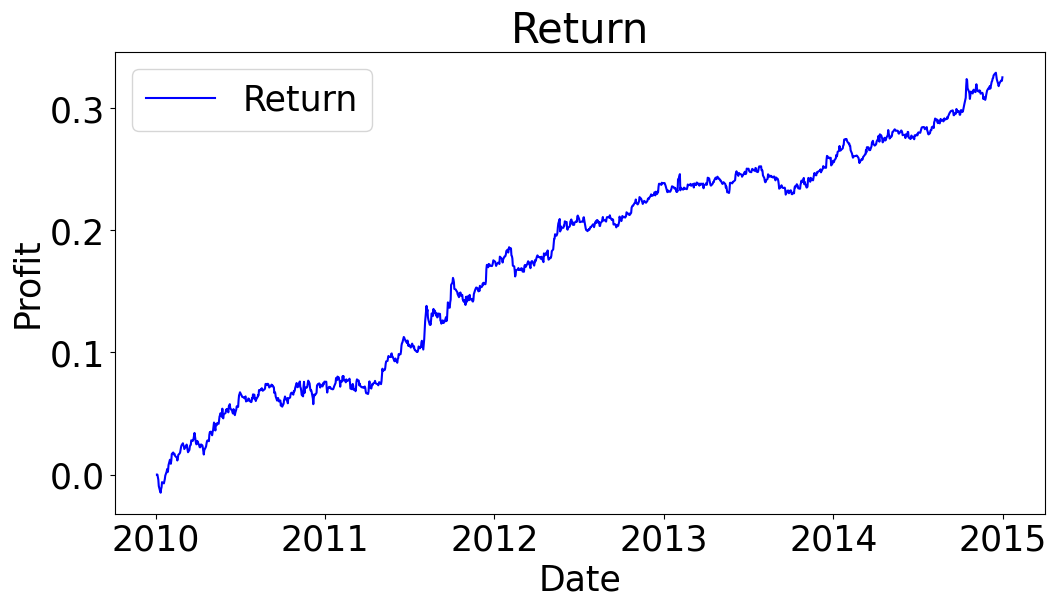

,years,sharpes,turnovers,cumpnls,pnl_sum,drawdownss
0,2010,1.877043,0.003027,0.076108,0.325432,0.019728
1,2011,2.150554,0.003268,0.098232,0.325432,0.019728
2,2012,1.780917,0.003107,0.062507,0.325432,0.019728
3,2013,0.679771,0.002856,0.022182,0.325432,0.019728
4,2014,2.067320,0.003072,0.066403,0.325432,0.019728


In [54]:
AlphaStats(alp7)

In [55]:
alp8 = ts_rank((df_o+df)**2/df_v, 20)/(df+df_l)
alp8 = -decay(alp8,2)
alp8 = truncate(alp8, 0.005)

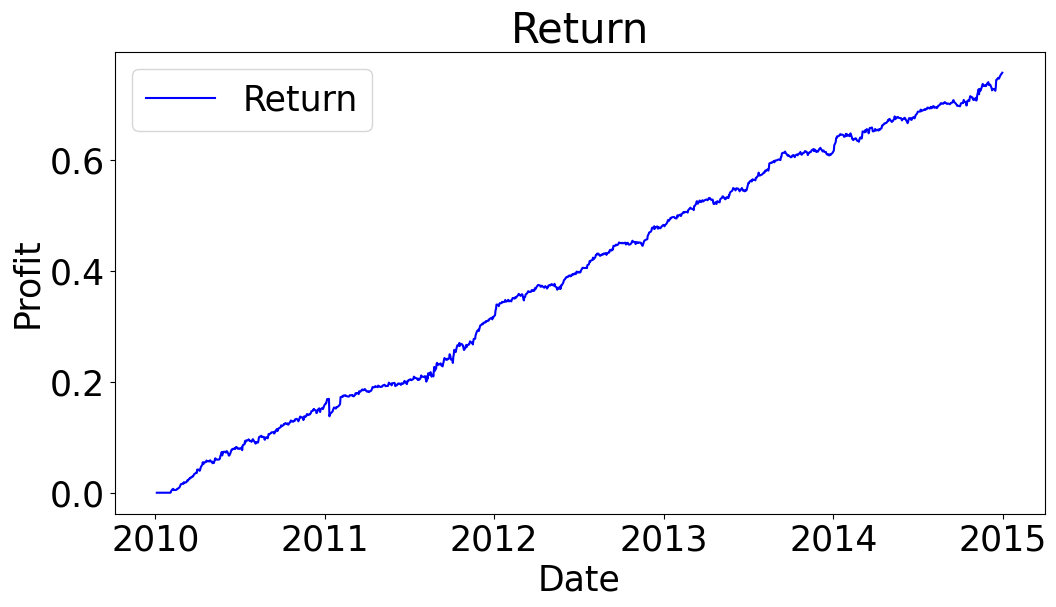

,years,sharpes,turnovers,cumpnls,pnl_sum,drawdownss
0,2010,4.471442,0.479144,0.157480,0.756662,0.015571
1,2011,2.925730,0.526517,0.162672,0.756662,0.015571
2,2012,4.602409,0.529677,0.162442,0.756662,0.015571
3,2013,4.115121,0.513434,0.148798,0.756662,0.015571
4,2014,2.894199,0.490493,0.125269,0.756662,0.015571


In [56]:
AlphaStats(alp8)

In [57]:
alp9 = -(ts_rank((df_o+df)**2/df_v, 5)/df_o**4)
alp9 = decay(alp9, 2.5)
alp9 = truncate(alp9, 0.0005)

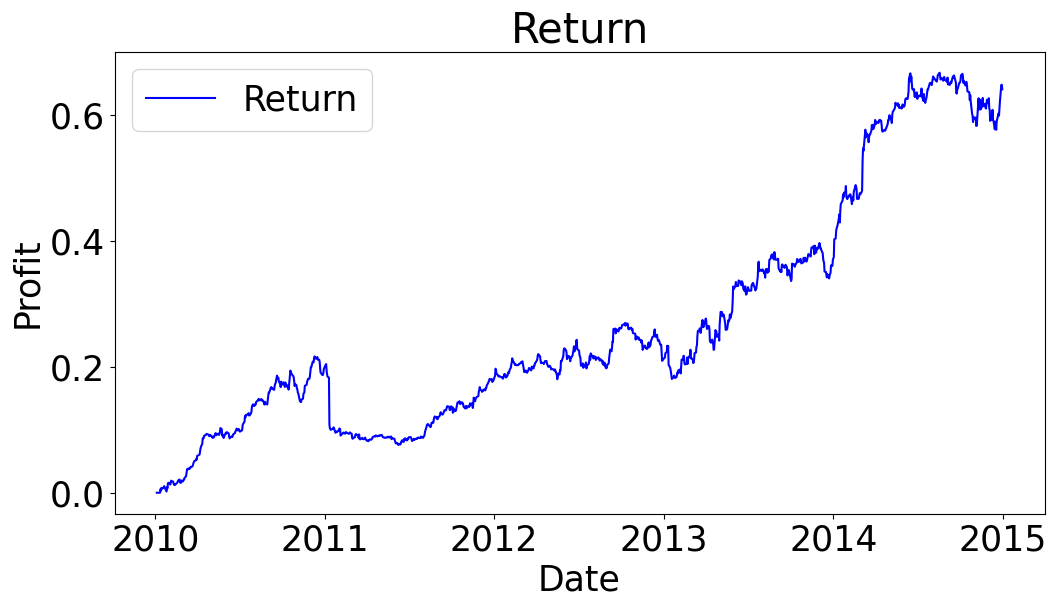

,years,sharpes,turnovers,cumpnls,pnl_sum,drawdownss
0,2010,3.280221,0.805792,0.198404,0.64057,0.090564
1,2011,-0.144031,0.855170,-0.012589,0.64057,0.090564
2,2012,0.484661,0.903759,0.035814,0.64057,0.090564
3,2013,1.530973,0.907074,0.182019,0.64057,0.090564
4,2014,1.801557,0.791265,0.236921,0.64057,0.090564


In [58]:
AlphaStats(alp9)

In [63]:
alp10 = (df_h + df_l)/2
alp10 = alp10.mask((alp10 > df), other=1)*(-1)
alp10 = rank(alp10).ewm(5).mean()
#alp10 = decay(alp10, 0.1)
alp10 = -truncate(alp10, 0.05)

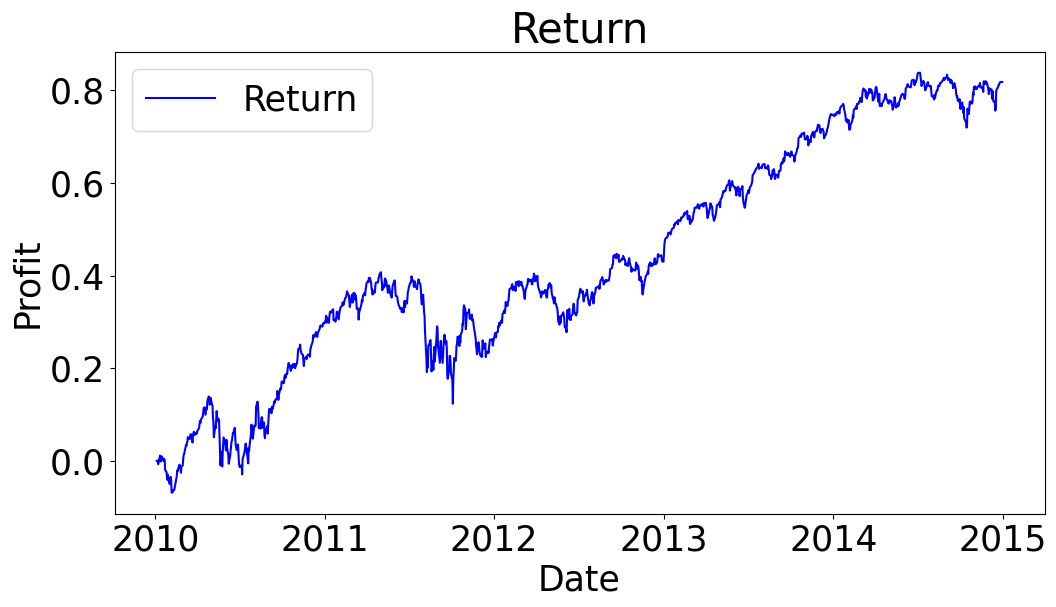

,years,sharpes,turnovers,cumpnls,pnl_sum,drawdownss
0,2010,1.502590,0.030389,0.296622,0.817426,0.118529
1,2011,-0.082652,0.015866,-0.020601,0.817426,0.118529
2,2012,1.373336,0.000000,0.203633,0.817426,0.118529
3,2013,2.482067,0.000000,0.269698,0.817426,0.118529
4,2014,0.508943,0.000000,0.068075,0.817426,0.118529


In [64]:
AlphaStats(alp10)

<Axes: >

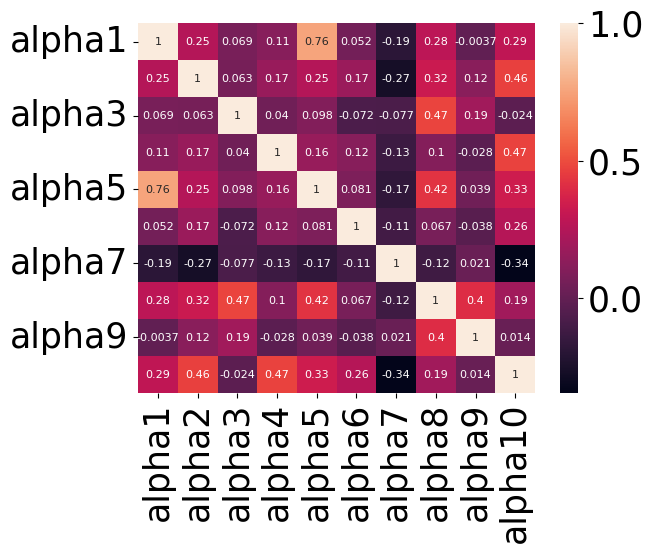

In [65]:
correl = pd.DataFrame({
    'alpha1' : pnl(alp1),
    'alpha2' : pnl(alp2),
    'alpha3' : pnl(alp3),
    'alpha4' : pnl(alp4),
    'alpha5' : pnl(alp5),
    'alpha6' : pnl(alp6),
    'alpha7' : pnl(alp7),
    'alpha8' : pnl(alp8),
    'alpha9' : pnl(alp9),
    'alpha10' : pnl(alp10),
})

sns.heatmap(correl.corr(), annot=True, annot_kws={"fontsize":8})

Text(0, 0.5, 'pnl')

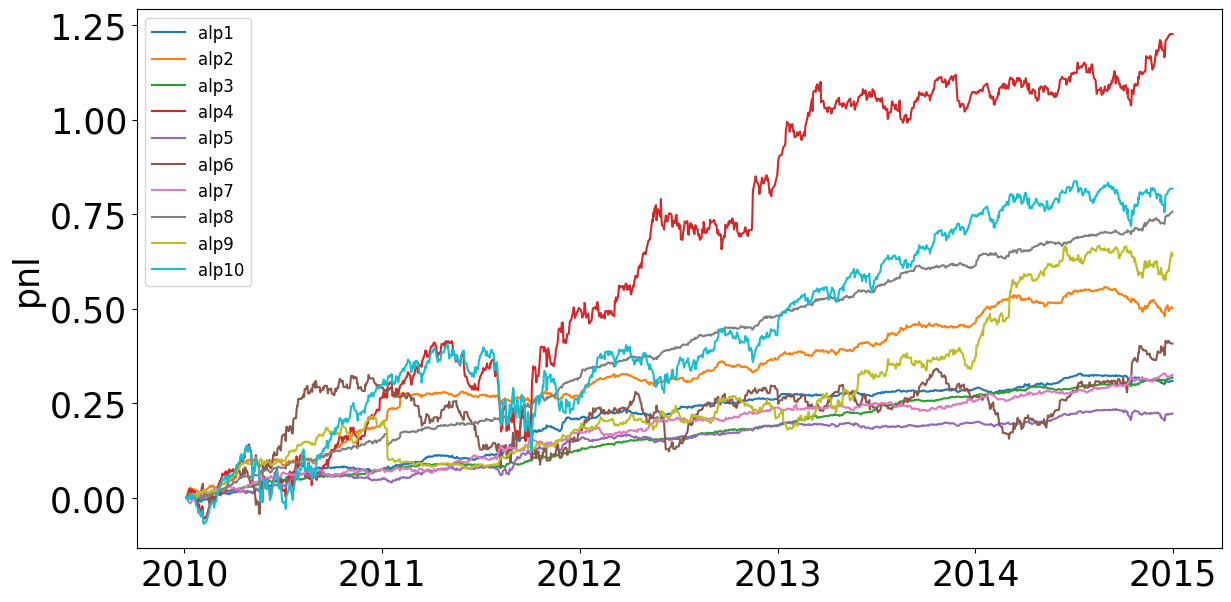

In [66]:
plt.figure(figsize=(14, 7))
plt.plot(cumpnl(alp1),label="alp1")
plt.plot(cumpnl(alp2),label="alp2")
plt.plot(cumpnl(alp3),label="alp3")
plt.plot(cumpnl(alp4),label="alp4")
plt.plot(cumpnl(alp5),label="alp5")
plt.plot(cumpnl(alp6),label="alp6")
plt.plot(cumpnl(alp7),label="alp7")
plt.plot(cumpnl(alp8),label="alp8")
plt.plot(cumpnl(alp9),label="alp9")
plt.plot(cumpnl(alp10),label="alp10")
plt.legend(fontsize=12)
plt.ylabel('pnl')

In [117]:
alphas1 = {
    'alpha1' : alp1, # pd.DataFrame,
    'alpha2' : alp2,
    'alpha3' : alp3,
    'alpha4' : alp4,
    'alpha5' : alp5,
    'alpha6' : alp6,
    'alpha7' : alp7,
    'alpha8' : alp8,
    'alpha9' : alp9,
    'alpha10' : alp10
}

In [119]:
alphas0 = {
    'alpha1' : alp1[0:252], # pd.DataFrame
    'alpha2' : alp2[0:252],
    'alpha3' : alp3[0:252],
    'alpha4' : alp4[0:252],
    'alpha5' : alp5[0:252],
    'alpha6' : alp6[0:252],
    'alpha7' : alp7[0:252],
    'alpha8' : alp8[0:252],
    'alpha9' : alp9[0:252],
    'alpha10' : alp10[0:252]
}
#alphas['alpha1']

In [121]:
ii = ['alpha1','alpha2','alpha3','alpha4','alpha5','alpha6','alpha7','alpha8','alpha9','alpha10']
n = len(ii)

In [123]:
portfel_0 = (alphas0[ii[0]] + alphas0[ii[1]] + alphas0[ii[2]] +  alphas0[ii[3]] + alphas0[ii[4]] + alphas0[ii[5]] +  alphas0[ii[6]] + alphas0[ii[7]] + alphas0[ii[8]] +  alphas0[ii[9]])/n

In [125]:
portfel_1 = (alphas1[ii[0]] + alphas1[ii[1]] + alphas1[ii[2]] +  alphas1[ii[3]] + alphas1[ii[4]] + alphas1[ii[5]] +  alphas1[ii[6]] + alphas1[ii[7]] + alphas1[ii[8]] +  alphas1[ii[9]])/n

In [128]:
portfel_1 = normalization(neutralization(portfel_1))

In [130]:
portfel_0 = normalization(neutralization(portfel_0))

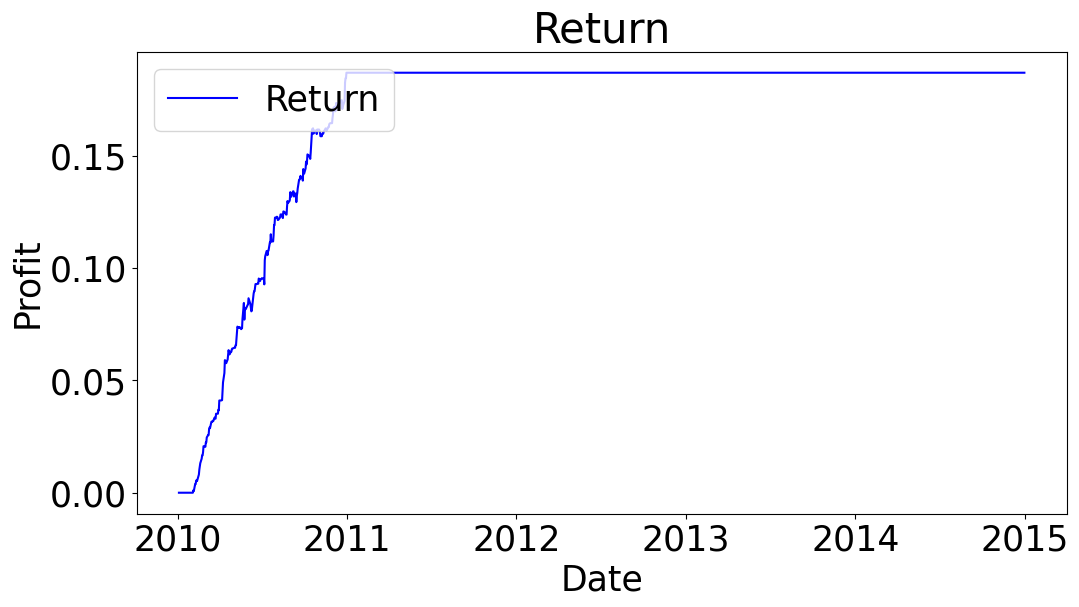

,years,sharpes,turnovers,cumpnls,pnl_sum,drawdownss
0,2010,5.879972,0.28208,0.186854,0.186854,0
1,2011,NaN,NaN,0.000000,0.186854,0
2,2012,NaN,NaN,0.000000,0.186854,0
3,2013,NaN,NaN,0.000000,0.186854,0
4,2014,NaN,NaN,0.000000,0.186854,0


In [132]:
AlphaStats(portfel_0)

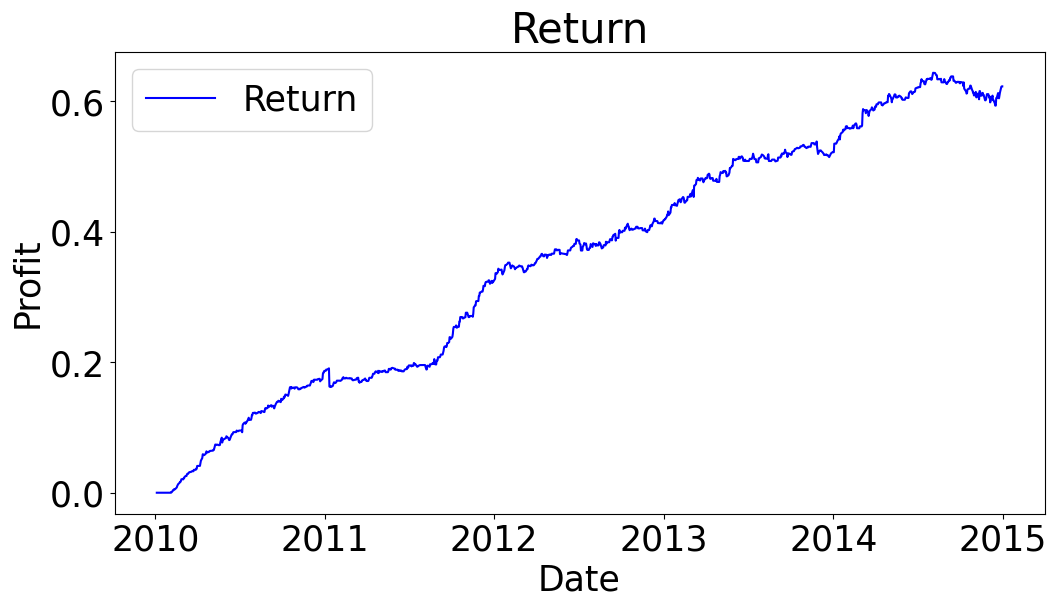

,years,sharpes,turnovers,cumpnls,pnl_sum,drawdownss
0,2010,5.879972,0.282080,0.186854,0.623034,0.050424
1,2011,3.050504,0.262941,0.141047,0.623034,0.050424
2,2012,2.194586,0.256885,0.091883,0.623034,0.050424
3,2013,2.353907,0.278800,0.115375,0.623034,0.050424
4,2014,1.564697,0.276220,0.087875,0.623034,0.050424


In [133]:
AlphaStats(portfel_1)

In [145]:
def sharpe5(alp, i):
  return pnl(alp)[252*i:252*(i+1)].mean() / pnl(alp)[252*i:252*(i+1)].std() * 252**0.5

In [146]:
portfel_2 =[]
for k in range(5):

  ii = ['alpha1','alpha2','alpha3','alpha4','alpha5','alpha6','alpha7','alpha8','alpha9','alpha10']

  alphas00 = {
    'alpha1' : alp1[252*k:252*(k+1)], # pd.DataFrame
    'alpha2' : alp2[252*k:252*(k+1)],
    'alpha3' : alp3[252*k:252*(k+1)],
    'alpha4' : alp4[252*k:252*(k+1)],
    'alpha5' : alp5[252*k:252*(k+1)],
    'alpha6' : alp6[252*k:252*(k+1)],
    'alpha7' : alp7[252*k:252*(k+1)],
    'alpha8' : alp8[252*k:252*(k+1)],
    'alpha9' : alp9[252*k:252*(k+1)],
    'alpha10' : alp10[252*k:252*(k+1)]}

  alphas_sh =  {
    'alpha1' : sharpe5(alp1,(k)), # sharp за предыдуший год
    'alpha2' : sharpe5(alp2,(k)),
    'alpha3' : sharpe5(alp3,(k)),
    'alpha4' : sharpe5(alp4,(k)),
    'alpha5' : sharpe5(alp5,(k)),
    'alpha6' : sharpe5(alp6,(k)),
    'alpha7' : sharpe5(alp7,(k)),
    'alpha8' : sharpe5(alp8,(k)),
    'alpha9' : sharpe5(alp9,(k)),
    'alpha10' : sharpe5(alp10,(k))}


  sum_sh = sum(alphas_sh.values()) #сумма sharp за  год всех альф
  alphas_mas2 = [value / sum_sh for value in alphas_sh.values()] # веса всех альф 
  port2 = {
      'alpha1' : [],
      'alpha2' : [],
      'alpha3' : [],
      'alpha4' : [],
      'alpha5' : [],
      'alpha6' : [],
      'alpha7' : [],
      'alpha8' : [],
      'alpha9' : [],
      'alpha10' : []
  }

  for m in range(len(ii)):
    port2[ii[m]] = (alphas00[ii[m]] * alphas_mas2[m])  # альфа умноженная на вес

  # Портфель за 1 год
  portfel_2_i = port2[ii[0]] + port2[ii[1]] + port2[ii[2]] +  port2[ii[3]] + port2[ii[4]] + port2[ii[5]] +  port2[ii[6]] + port2[ii[7]] + port2[ii[8]] +  port2[ii[9]]
  portfel_2.append(portfel_2_i)
  # portfel_3 += portfel_3_i

In [149]:
portfel_0

,iba.us,wpz.us,flic.us,ncs.us,gpk.us,wti.us,mygn.us,kelya.us,nycb.us,elp.us,...,nea.us,asx.us,faro.us,awk.us,chn.us,omex.us,roic.us,nbl.us,atu.us,apf.us
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-27,0.000530,0.000218,-0.000382,0.000111,-0.000334,-0.000131,-0.000304,-0.000281,0.001174,0.000490,...,0.000702,NaN,0.000069,-0.000266,0.000527,0.00011,0.002414,-0.000307,-0.000044,0.000677
2010-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-29,0.000145,0.000236,-0.000056,-0.000167,-0.000332,-0.000398,-0.000042,-0.000379,-0.000244,0.000586,...,0.000273,0.001893,-0.000400,-0.000067,0.000447,-0.00010,0.000758,-0.000016,0.000048,0.000686
2010-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
#portfel_22 = portfel_1.append(portfel_2[1])
#portfel_22 = portfel_22.append(portfel_2[2])
#portfel_22 = portfel_22.append(portfel_2[3])
#portfel_22 = portfel_22.append(portfel_2[4])

portfel_22 = portfel_0.copy(deep=True)
portfel_22 = pd.concat([portfel_22, portfel_2[1]])
portfel_22 = pd.concat([portfel_22, portfel_2[2]])
portfel_22 = pd.concat([portfel_22, portfel_2[3]])
portfel_22 = pd.concat([portfel_22, portfel_2[4]])

In [154]:
portfel_22 = normalization(neutralization(portfel_22))

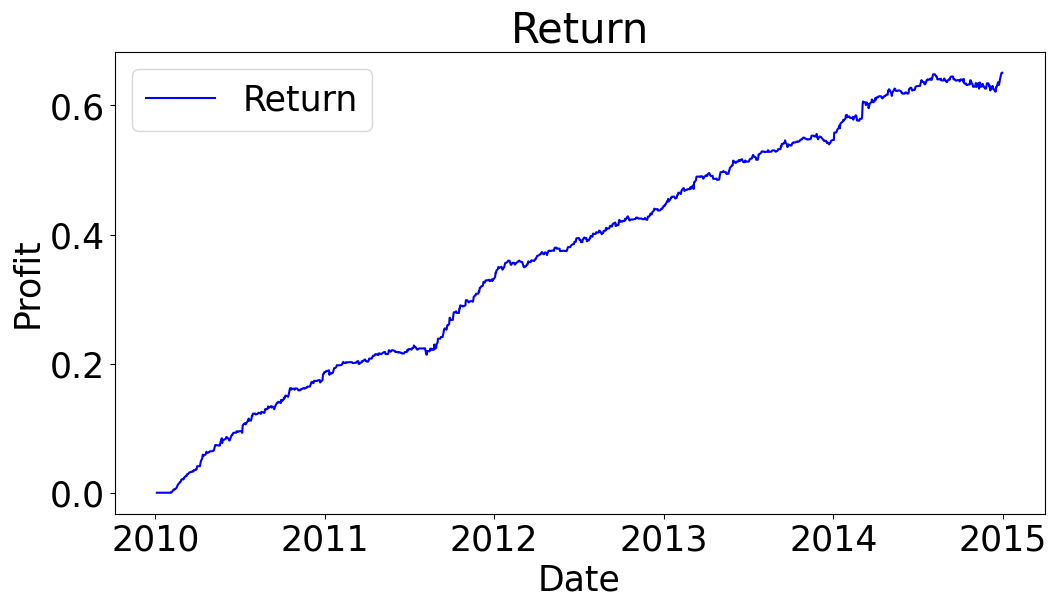

,years,sharpes,turnovers,cumpnls,pnl_sum,drawdownss
0,2010,5.879972,0.282080,0.186854,0.650726,0.026813
1,2011,4.320347,0.239719,0.147326,0.650726,0.026813
2,2012,3.807512,0.252348,0.111984,0.650726,0.026813
3,2013,3.380931,0.309303,0.111839,0.650726,0.026813
4,2014,1.947375,0.272246,0.092724,0.650726,0.026813


In [155]:
AlphaStats(portfel_22)

In [156]:
def cumpnl5(alp, i):
    return (pnl(alp)[252*i:252*(i+1)].sum())

In [159]:
portfel_3 =[]
for k in range(5):

  ii = ['alpha1','alpha2','alpha3','alpha4','alpha5','alpha6','alpha7','alpha8','alpha9','alpha10']

  alphas00 = {
    'alpha1' : alp1[252*k:252*(k+1)], # pd.DataFrame
    'alpha2' : alp2[252*k:252*(k+1)],
    'alpha3' : alp3[252*k:252*(k+1)],
    'alpha4' : alp4[252*k:252*(k+1)],
    'alpha5' : alp5[252*k:252*(k+1)],
    'alpha6' : alp6[252*k:252*(k+1)],
    'alpha7' : alp7[252*k:252*(k+1)],
    'alpha8' : alp8[252*k:252*(k+1)],
    'alpha9' : alp9[252*k:252*(k+1)],
    'alpha10' : alp10[252*k:252*(k+1)]}

  alphas_pnl = {
    'alpha1' : cumpnl5(alp1,k-1), # pnl за год
    'alpha2' : cumpnl5(alp2,k-1),
    'alpha3' : cumpnl5(alp3,k-1),
    'alpha4' : cumpnl5(alp4,k-1),
    'alpha5' : cumpnl5(alp5,k-1),
    'alpha6' : cumpnl5(alp6,k-1),
    'alpha7' : cumpnl5(alp7,k-1),
    'alpha8' : cumpnl5(alp8,k-1),
    'alpha9' : cumpnl5(alp9,k-1),
    'alpha10' : cumpnl5(alp10,k-1)
}


  sum_pnl = sum(alphas_pnl.values()) #сумма pnl за 5 год всех альф
  alphas_mas3 = [value / sum_pnl for value in alphas_pnl.values()] # веса всех альф

  port3 = {
      'alpha1' : [],
      'alpha2' : [],
      'alpha3' : [],
      'alpha4' : [],
      'alpha5' : [],
      'alpha6' : [],
      'alpha7' : [],
      'alpha8' : [],
      'alpha9' : [],
      'alpha10' : []
  }

  for m in range(len(ii)):
    port3[ii[m]] = (alphas00[ii[m]] * alphas_mas3[m])  # альфа умноженная на вес

  # Портфель за 1 год
  portfel_3_i = port3[ii[0]] + port3[ii[1]] + port3[ii[2]] +  port3[ii[3]] + port3[ii[4]] + port3[ii[5]] +  port3[ii[6]] + port3[ii[7]] + port3[ii[8]] +  port3[ii[9]]
  portfel_3.append(portfel_3_i)
  #  portfel_3 += portfel_3_i

In [160]:
portfel_33 = portfel_1.copy(deep=True)
portfel_33 = pd.concat([portfel_22, portfel_3[1]])
# portfel_33 = portfel_33.append(portfel_3[1])
portfel_33 = pd.concat([portfel_22, portfel_3[2]])
portfel_33 = pd.concat([portfel_22, portfel_3[3]])
portfel_33 = pd.concat([portfel_22, portfel_3[4]])

In [161]:
portfel_33 = normalization(neutralization(portfel_33))


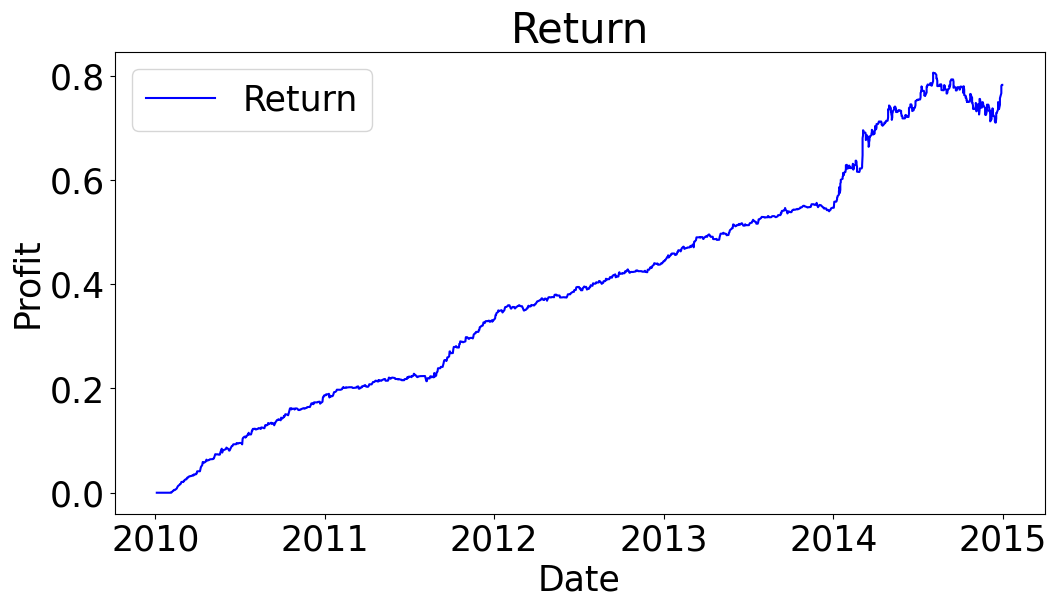

,years,sharpes,turnovers,cumpnls,pnl_sum,drawdownss
0,2010,5.879972,0.282080,0.186854,0.782101,0.026813
1,2011,4.320347,0.239719,0.147326,0.782101,0.026813
2,2012,3.807512,0.252348,0.111984,0.782101,0.026813
3,2013,3.380931,0.309303,0.111839,0.782101,0.026813
4,2014,3.242269,0.279999,0.208622,0.782101,0.026813


In [162]:
AlphaStats(portfel_33)